In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [5]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [6]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 375, 500),Image (3, 352, 500),Image (3, 800, 440),Image (3, 500, 375),Image (3, 600, 800)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 535, 800),Image (3, 2000, 1500),Image (3, 375, 500),Image (3, 600, 800),Image (3, 1500, 2000)
y: CategoryList
class-326,class-872,class-771,class-784,class-67
Path: train;

Test: None

In [7]:
data = src.transform(tfms,size=512).databunch(bs=32).normalize(imagenet_stats)

In [8]:
data.c

45

In [9]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')]).to_fp16()

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


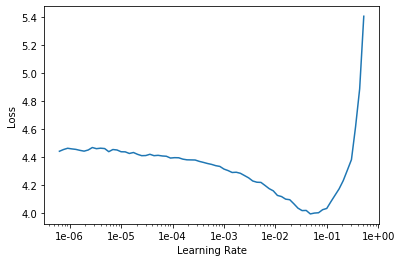

In [11]:
learn.recorder.plot()

In [12]:
lr=7.5e-3

In [13]:
learn.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.665259,1.545228,0.443973,0.556027,0.464311,21:14
1,1.202973,0.948596,0.284900,0.715100,0.650283,21:16


In [14]:
learn.save('densenet121-512-75e3-2')

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


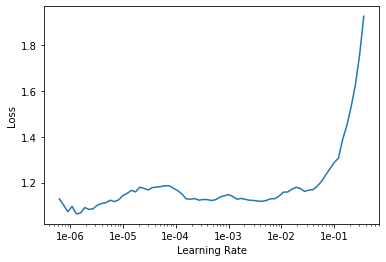

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2,slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.115524,0.922684,0.277498,0.722502,0.664846,21:15
1,1.079555,0.905908,0.271735,0.728265,0.672027,21:16


In [18]:
learn.save('densenet121-512-slice-2')